# Data Understanding, Data Preprocessing & Optimierungen

In [112]:
import numpy as np
import pandas as pd
from numpy import mean
from pandas import Series
from numpy.random import randn
from numpy import loadtxt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam

from keras_tuner.tuners import RandomSearch

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.model_selection import GroupKFold

import math

import statistics as stat
import scipy.stats as stats

from sklearn.feature_selection import RFE

import random

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

### Einlesen des Datensatzes

In [4]:
data = pd.read_csv('/Users/sabrinagreifzu/Documents/Masterstudium Data Science/Machine Learning und Deep Learning/Thomas/activity_recognition_with_index 3.csv')

In [5]:
data.head()

,Person,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,DH96,DH97,DH98,DH99,DH100,DH101,DH102,DH103,DH104,class
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,1
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,1
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,1
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,1
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,1


In [6]:
data.shape

(4480, 535)

In [7]:
data['class'].value_counts()

4    1120
1    1120
2    1120
3    1120
Name: class, dtype: int64

### Verwendung der Dataframe.info()-Funktion, um einen Überblick über den Datensatz zu bekommen

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Person to class
dtypes: float64(519), int64(16)
memory usage: 18.3 MB


### Konvertierung aller Spalten in den float-Datentyp

Da der Datensatz in gemischten Datentypen vorliegt, folgt die Konvertierung aller Spalten in den float-Datentyp (Der Float-Datentyp bietet sich in diesem Fall an, da die Daten überwiegend im Float-Datentyp vorliegen und der Float-Datentyp genauere Ergebnisse für das Modell ausgeben wird).

In [9]:
data[["E21","E22","E57","E62","E64","E114","T94","DA57","DA58","DA59","DA62","DH57","DH58","DH59"]] = data[["E21","E22","E57","E62","E64","E114","T94","DA57","DA58","DA59","DA62","DH57","DH58","DH59"]].astype(float)

In [10]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 535 columns):
 #    Column  Dtype  
---   ------  -----  
 0    Person  int64  
 1    E1      float64
 2    E2      float64
 3    E3      float64
 4    E4      float64
 5    E5      float64
 6    E6      float64
 7    E7      float64
 8    E8      float64
 9    E9      float64
 10   E10     float64
 11   E11     float64
 12   E12     float64
 13   E13     float64
 14   E14     float64
 15   E15     float64
 16   E16     float64
 17   E17     float64
 18   E18     float64
 19   E19     float64
 20   E20     float64
 21   E21     float64
 22   E22     float64
 23   E23     float64
 24   E24     float64
 25   E25     float64
 26   E26     float64
 27   E27     float64
 28   E28     float64
 29   E29     float64
 30   E30     float64
 31   E31     float64
 32   E32     float64
 33   E33     float64
 34   E34     float64
 35   E35     float64
 36   E36     float64
 37   E37     float64
 38   E38   

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Person to class
dtypes: float64(533), int64(2)
memory usage: 18.3 MB


### Verwendung der describe()-Funktion zur Berechnung statistischer Daten

In [12]:
data.describe()

,Person,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,DH96,DH97,DH98,DH99,DH100,DH101,DH102,DH103,DH104,class
count,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,...,4480.000000,4.480000e+03,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4.480000e+03,4.480000e+03,4480.000000
mean,20.500000,0.069109,0.488721,0.064519,0.068895,0.640896,6.986733,1.504077,-1.243163,-0.260268,...,995.125291,1.783296e+10,0.146855,46.787567,378.001879,144.291078,9.347557,3.513370e+07,1.359751e+07,2.500000
std,11.544685,0.461571,0.688014,0.513720,0.636866,1.341187,7.005764,1.357288,1.231516,0.747809,...,107.699426,3.441611e+10,0.431288,87.299176,715.895192,264.241472,16.177566,6.779186e+07,2.849531e+07,1.118159
min,1.000000,-1.401350,0.044061,-1.629660,-2.780330,-7.320410,1.076340,0.118958,-4.031040,-3.931120,...,220.550000,7.194500e+02,0.000012,0.008857,0.113070,0.034914,0.001795,7.315860e+00,3.062260e+01,1.000000
25%,10.750000,-0.014160,0.138413,-0.043896,-0.064297,-0.096772,3.572295,0.563736,-1.631850,-0.237739,...,1015.330000,1.435125e+08,0.005085,1.345875,8.916457,4.406465,0.872344,2.872438e+05,2.679085e+05,1.750000
50%,20.500000,-0.000825,0.208430,-0.015432,-0.026010,0.509039,4.924720,0.972716,-0.789900,-0.120764,...,1015.740000,1.218840e+09,0.017072,4.844600,32.761550,15.043550,2.941755,2.400135e+06,1.193080e+06,2.500000
75%,30.250000,0.009368,0.414216,0.001261,-0.002398,1.455420,8.153475,1.838640,-0.334751,-0.066397,...,1015.840000,1.279192e+10,0.085110,35.001100,277.930000,112.850000,10.233175,2.519182e+07,6.489048e+06,3.250000
max,40.000000,3.920770,3.985120,4.076450,4.544780,9.045220,116.388000,4.644590,3.557610,4.041960,...,1018.630000,1.224190e+11,5.710930,320.499000,2605.500000,989.677000,138.119000,2.410860e+08,1.187810e+08,4.000000


### Untersuchung auf fehlende Werte im Datensatz

In [13]:
def check_NaN(data):
    null_checking = []
    for column in data.columns:
        not_null = data[column].isnull().value_counts()[0]
        try:
            is_null = data[column].isnull().value_counts()[1]
        except:
            is_null = 0
        temp_dict = {'name': column, 'is_null': is_null, 'not_null': not_null}
        null_checking.append(temp_dict)
    df_ = pd.DataFrame(null_checking)
    return df_

In [14]:
check_NaN(data)

,name,is_null,not_null
0,Person,0,4480
1,E1,0,4480
2,E2,0,4480
3,E3,0,4480
4,E4,0,4480
...,...,...,...
530,DH101,0,4480
531,DH102,0,4480
532,DH103,0,4480
533,DH104,0,4480


In [15]:
check_for_nan = data.isnull().values.any()

In [16]:
check_for_nan

False

### Untersuchung auf Duplikate im Datensatz

In [17]:
def check_duplicates(data):
    dup_checking = []
    for column in data.columns:
        not_duplicated = data[column].duplicated().value_counts()[0]
        try:
            duplicated = data[column].duplicated().value_counts()[1]
        except:
            duplicated = 0
        temp_dict = {
            'name': column,
            'duplicated': duplicated,
            'not_duplicated': not_duplicated
        }
        dup_checking.append(temp_dict)
    df_ = pd.DataFrame(dup_checking)
    return df_

In [18]:
check_duplicates(data)

,name,duplicated,not_duplicated
0,Person,4440,40
1,E1,4,4476
2,E2,11,4469
3,E3,9,4471
4,E4,2197,2283
...,...,...,...
530,DH101,9,4471
531,DH102,6,4474
532,DH103,69,4411
533,DH104,13,4467


### Untersuchung auf korrelierende Features

Die hohe Anzahl korrelierender Features sowie zahlreiche Duplikate im Datensatz lassen darauf schließen, dass Feature Selection in der Phase des Preprocessings eine wichtige Kompente darstellt. 

In [19]:
def top_correlated_features(data, limit=.75, verbose=False):
    df_corr = data.corr().abs().unstack().reset_index().sort_values(
        0, ascending=False)
    df_corr.columns = ["feature_0", 'feature_1', 'correlation']
    df_corr['keep_me'] = df_corr.apply(
        lambda x: False if x['feature_0'] == x['feature_1'] else True, axis=1)
    df_corr['feature_combo'] = df_corr.apply(
        lambda x: ' and '.join(set(x[['feature_0', 'feature_1']])), axis=1)

    corr_features = df_corr[df_corr.keep_me == True][[
        'feature_combo', 'correlation'
    ]].drop_duplicates().reset_index(drop='index')
    # features with correlation more than 75%
    if verbose == True:
        return corr_features
    else:
        return corr_features[corr_features.correlation > limit]

In [20]:
top_correlated_features(data, limit=.75, verbose=False)

,feature_combo,correlation
0,T77 and T75,1.000000
1,T75 and T77,1.000000
2,T89 and T91,1.000000
3,T89 and T92,1.000000
4,E111 and E112,1.000000
...,...,...
9061,E88 and E170,0.750473
9062,E69 and E168,0.750443
9063,E130 and E16,0.750223
9064,E102 and E55,0.750124


### Darstellung des Wertebereichs

Auch wenn die oben angezeigte Grafik nur einen kleinen Ausschnitt der Daten zeigt, ist bereits hier erkennbar, dass die Daten zur Weiterverarbeitung skaliert werden müssen, da die Datenwerte teils sehr weit auseinanderliegen.

In [28]:
tile_size=20
axis_title_size=20
axis_size=20

In [29]:
features = random.sample(list(data.columns), 30)
features

['T122',
 'E172',
 'DA9',
 'DA25',
 'DA16',
 'E170',
 'E23',
 'E48',
 'DH79',
 'DA22',
 'DA35',
 'T140',
 'DA27',
 'E58',
 'E116',
 'T101',
 'E35',
 'T128',
 'E91',
 'E144',
 'T75',
 'DA101',
 'DH92',
 'DA71',
 'E159',
 'T31',
 'DH46',
 'T95',
 'E139',
 'T39']

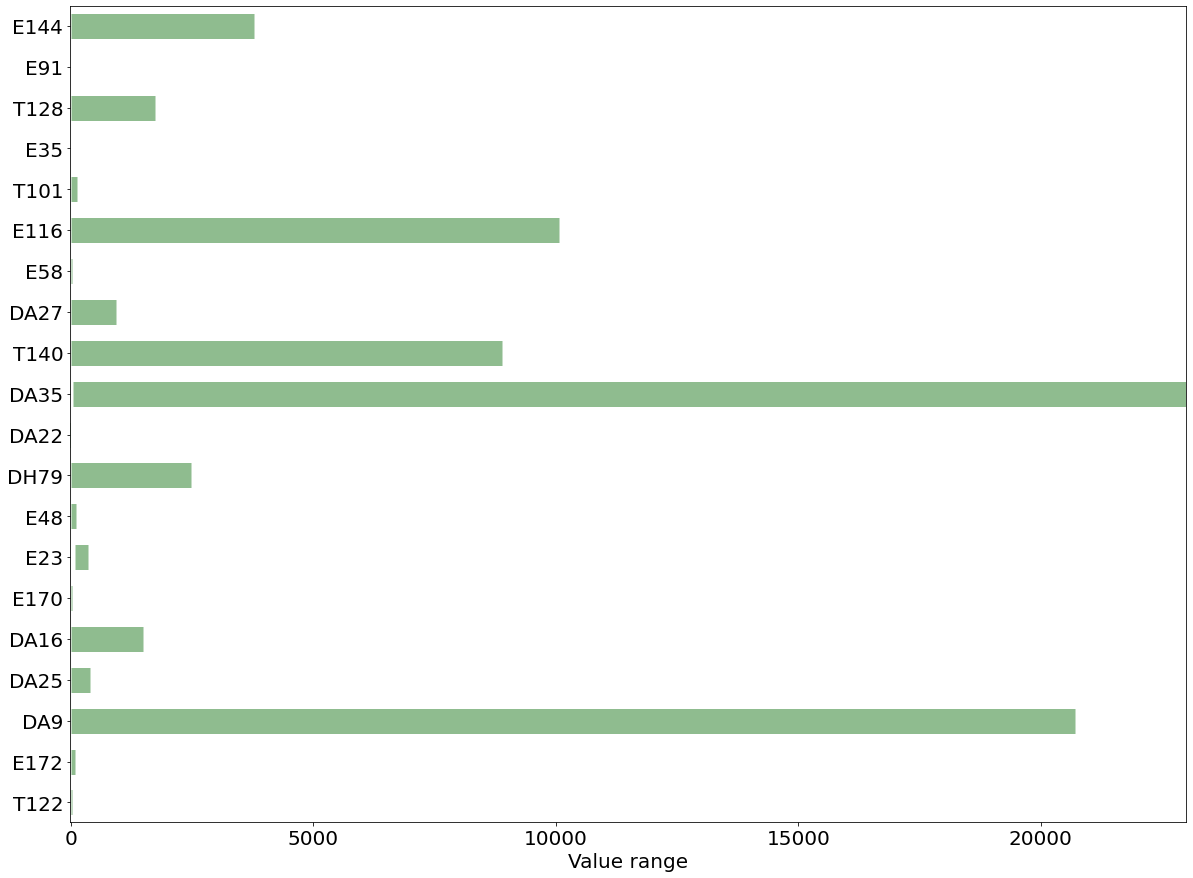

In [30]:
maxfs = [[data[[x]].min()[x], data[[x]].max()[x]] for x in features]
features2 = [[i,i] for f, i in enumerate(features)]

fig,ax = plt.subplots(figsize=(20,15))
ax.tick_params(labelsize=axis_size, which='both', axis="both", direction='out')

ax.set_xlabel('Value range', fontsize=axis_title_size)

ax.set_xlim(-15, 23000)

plt.margins(0.025)

for i in range(20):
    ax.plot(maxfs[i], features2[i], lw=25, color= 'darkseagreen', solid_capstyle="butt")

## Feature Importance

### Splitten der Daten in Features, die Zielvariable 'class' und die Group-Variable "Person"

In [61]:
data_input = data.drop(['Person', 'class'], axis = 1)
data_person = data['Person']
data_labels_raw = data['class']

### Splitten der Daten in Trainings- und Test-Datendaten (90% Trainingsdaten, 10% Testdaten)

In [62]:
train_data, test_data, train_labels_raw, test_labels_raw = train_test_split(data_input, data_labels_raw, test_size = 0.1, random_state = 123)

### Skalierung der Daten, um eine Verzerrung des Ergebnisse durch Outliers zu vermeiden

In [35]:
scaler = MinMaxScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

### Feature Importance: Visualisierung der wichtigsten Features im Datensatz; Anwendung von GridSearch zur Erschließung der besten Paramterkombination

In [34]:
clf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, verbose = 2), param_grid={
    'n_estimators': [200, 500, 1000],        
    'max_depth': [4, 5, 6],
    'criterion': ['gini', 'entropy']
}, n_jobs=-1)
    
clf.fit(train_data, train_labels_raw)
    
clf = clf.best_estimator_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


building tree 1 of 200building tree 2 of 200

building tree 3 of 200building tree 4 of 200
building tree 5 of 200

building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200building tree 11 of 200
building tree 12 of 200building tree 13 of 200
building tree 14 of 200building tree 15 of 200

building tree 16 of 200


building tree 17 of 200
building tree 18 of 200
building tree 19 of 200building tree 20 of 200

building tree 21 of 200
building tree 22 of 200
building tree 23 of 200building tree 24 of 200

building tree 25 of 200building tree 26 of 200

building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200building tree 38 of 200

building tree 39 of 200
building tree 40 of 200
building tree 41 of 200building tree 42 of 200
bu

[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.0s



building tree 147 of 200building tree 148 of 200

building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200building tree 155 of 200
building tree 156 of 200

building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200building tree 163 of 200

building tree 164 of 200
building tree 165 of 200building tree 166 of 200

building tree 167 of 200
building tree 168 of 200
building tree 169 of 200building tree 170 of 200

building tree 171 of 200building tree 172 of 200building tree 173 of 200
building tree 174 of 200


building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200building tree 181 of 200

building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished


In [38]:
clf

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       n_jobs=-1, verbose=2)

In [39]:
feat_labels = list(data_input.columns.values[:-1])
len(feat_labels)

532

### Die Funktion "feature_importances_" gibt anschließend die wichtigsten 100 Features (wurde manuell definiert) in Form eines Dictionaries aus

In [40]:
imp_dict = dict()
    
for feature in zip(feat_labels, clf.feature_importances_):
    imp_dict[feature[0]] = feature[1]
imp_dict = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

In [41]:
imp_dict

{'E67': 0.03992056125259841,
 'T13': 0.028587872309896182,
 'E69': 0.02603187407968347,
 'T28': 0.02576642359924407,
 'E76': 0.020626502006085578,
 'E26': 0.02047857338451169,
 'E75': 0.020065381563020835,
 'E70': 0.019818264438569398,
 'T2': 0.015150291397231168,
 'E18': 0.015078421592594857,
 'T150': 0.014573293074822085,
 'T48': 0.014165701762361973,
 'E73': 0.014000893530906328,
 'T17': 0.013856926843772776,
 'E23': 0.013779708252043929,
 'E77': 0.013385765084825973,
 'T132': 0.013141007235447436,
 'E53': 0.013021366089782447,
 'E45': 0.012993962389629396,
 'E43': 0.012927145174517136,
 'T7': 0.012669725332467416,
 'E46': 0.012663579431392425,
 'E52': 0.012271378897492162,
 'E51': 0.012259457535582316,
 'E62': 0.011924860721284456,
 'T52': 0.01183036636146229,
 'E17': 0.011427998994290551,
 'E15': 0.010619078618931426,
 'T87': 0.010568107845393256,
 'T32': 0.009741468818917097,
 'T90': 0.009148595406113241,
 'T59': 0.008971558951887308,
 'T116': 0.008692345202539215,
 'T102': 0.008

top_features: 100
the_rest_features 432


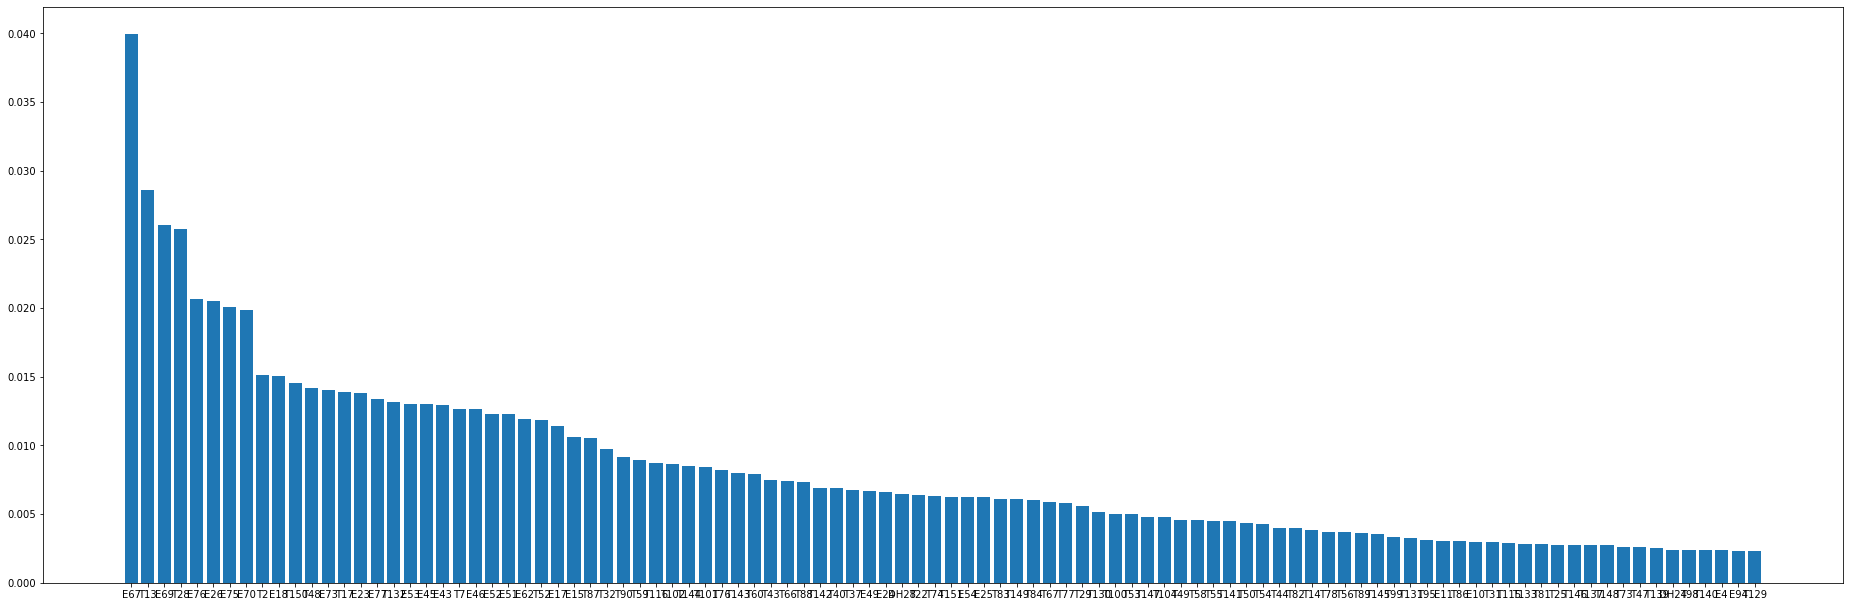

In [42]:
fig = plt.figure(figsize=(25,8))
ax = fig.add_axes([0,0,1,1])

top_features = dict(list(imp_dict.items())[0:100])
the_rest_features = dict(list(imp_dict.items())[100:])
print("top_features:", len(top_features))
print("the_rest_features", len(the_rest_features))
ax.bar(top_features.keys(), top_features.values())
plt.show()

In [43]:
best_features_set_X = data_input[top_features]
complete_set_X = data_input
the_rest_set_X = data_input[the_rest_features]

In [44]:
important_X_train, important_X_test, important_y_train, important_y_test = train_test_split(best_features_set_X, data_person, test_size=0.2, random_state=40)
the_rest_X_train, the_rest_X_test, the_rest_y_train, the_rest_y_test = train_test_split(the_rest_set_X, data_person, test_size=0.2, random_state=40)

### Korrelationsmatrix der wichtigsten Features
Werte im positiven Bereich verdeutlichen eine positive Korrelation, Werte im negativen Bereich verdeutlichen eine negative Korrelation.

In [45]:
best_features_set_X.corr()

,E67,T13,E69,T28,E76,E26,E75,E70,T2,E18,...,T148,T73,T47,T139,DH24,T98,T140,E4,E94,T129
E67,1.000000,-0.001277,0.997368,0.000941,0.945858,-0.775504,0.925112,0.981906,0.012326,-0.782538,...,-0.179374,-0.042839,0.086626,-0.056974,0.270871,-0.058546,-0.065076,0.199101,0.014194,-0.025968
T13,-0.001277,1.000000,-0.001943,0.998012,0.070766,-0.129117,-0.078108,0.000659,0.946986,-0.116752,...,-0.050556,-0.015682,-0.095695,-0.019972,0.289603,-0.020452,-0.022206,0.082118,0.321773,-0.011303
E69,0.997368,-0.001943,1.000000,0.000077,0.948364,-0.772436,0.924621,0.989386,0.012655,-0.784590,...,-0.176232,-0.039939,0.080450,-0.053803,0.270584,-0.055391,-0.062050,0.199396,0.021863,-0.022744
T28,0.000941,0.998012,0.000077,1.000000,0.070359,-0.127175,-0.073263,0.002312,0.936717,-0.114361,...,-0.049788,-0.015677,-0.091890,-0.019850,0.267234,-0.020324,-0.022046,0.081241,0.310972,-0.011353
E76,0.945858,0.070766,0.948364,0.070359,1.000000,-0.809610,0.773102,0.935783,0.086990,-0.814641,...,-0.181989,-0.041786,0.073580,-0.056429,0.294010,-0.057997,-0.064850,0.293801,0.207897,-0.023863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T98,-0.058546,-0.020452,-0.055391,-0.020324,-0.057997,0.021443,-0.050275,-0.051615,-0.022052,0.022472,...,0.316297,0.974793,0.032712,0.999794,-0.047201,1.000000,0.994967,-0.038212,0.052000,0.944664
T140,-0.065076,-0.022206,-0.062050,-0.022046,-0.064850,0.026424,-0.056157,-0.057970,-0.024005,0.027624,...,0.318571,0.954385,0.025335,0.993628,-0.051787,0.994967,1.000000,-0.040267,0.050943,0.909811
E4,0.199101,0.082118,0.199396,0.081241,0.293801,-0.196630,0.058653,0.204750,0.097517,-0.195732,...,-0.080655,-0.030916,0.035548,-0.037495,0.152844,-0.038212,-0.040267,1.000000,0.058721,-0.025441
E94,0.014194,0.321773,0.021863,0.310972,0.207897,-0.322703,-0.201856,0.030433,0.310670,-0.306751,...,-0.009074,0.050917,-0.101848,0.052052,0.150330,0.052000,0.050943,0.058721,1.000000,0.052527


## Optimierungen großes ANN

In [ ]:
data = pd.read_csv('/Users/sabrinagreifzu/Documents/Masterstudium Data Science/Machine Learning und Deep Learning/Thomas/activity_recognition_with_index 3.csv')

### Definition eines Ablageorts für das spätere Modell

In [87]:
path_models = '../models/'

### Data Preparation

In [88]:
# Splitten der Daten in Features, die Zielvariable 'class' und die Group-Variable "Person"
data_input = data.drop(['Person', 'class'], axis = 1)
data_person = data['Person']
data_labels_raw = data['class']

# Splitten der Daten in Trainings- und Testset
train_data, test_data, train_labels_raw, test_labels_raw = train_test_split(
                      data_input, data_labels_raw, test_size = 0.1, random_state=123)

# Skalieren der Daten, um sicherzustellen, dass jede Variable den gleichen Einfluss auf das Endergebnis hat
scaler = MinMaxScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# One-hot-encoding 
encoder = LabelBinarizer().fit(train_labels_raw)
train_labels = encoder.transform(train_labels_raw)
test_labels = encoder.transform(test_labels_raw)


#Extrahieren von Features und Zielvariable
n_attributes = data_input.shape[1]
n_classes = train_labels.shape[1]

### Erstellung des Neuronalen Netzes

In [89]:
def createMyANN(hyperparams):

    #Hyperparameter für Keras-Tuner
    hp_units = hyperparams.Int('units', min_value=500, max_value=600, step=20)
    hp_activations = hyperparams.Choice('activation', values=['relu', 'tanh', 'elu'])
    hp_lr = hyperparams.Choice('learning_rate', values=[0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005])
    hp_nbr_hidden_layers = hyperparams.Int('nbr_hidden_layers', min_value=2, max_value=4, step=1)

    model = Sequential()  
    model.add( InputLayer(input_shape=(n_attributes, ), name="input_1D_vector")) 

    for i in range(hp_nbr_hidden_layers):
        model.add( Dense(units=hp_units, activation=hp_activations,
                             name="hidden" +str(i)+ "_" +str(hp_units)+ "nodes")) #hidden layer


    model.add( Dense(units=n_classes, activation='softmax', name="output_softmax"))
    
    optim = Adam(learning_rate = hp_lr) 
    
    #model.compile(loss='mse', optimizer=optim, metrics=['accuracy'])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])
    
    return model

### Verwendung des Keras-Tuners zur Erschließung der besten Hyperparameter-Kombination

In [90]:
keras_tuner = RandomSearch(
    createMyANN, 
    objective= 'val_accuracy', 
    max_trials=20,  
    executions_per_trial=1,  
    directory= path_models + 'ann_512_opt',
    project_name='ann_512_opt')

import time
time_start = time.time()


keras_tuner.search(train_data, train_labels, validation_split=0.1, 
             epochs=500, verbose=2,
             callbacks=[keras.callbacks.EarlyStopping(patience=50,
                                                      restore_best_weights=True)])

time_end = time.time()

INFO:tensorflow:Reloading Oracle from existing project ../models/ann_512_opt/ann_512_opt/oracle.json
INFO:tensorflow:Reloading Tuner from ../models/ann_512_opt/ann_512_opt/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [91]:
hours = (time_end - time_start) // 3600
minutes = ((time_end - time_start) % 3600) // 60
seconds = round((time_end - time_start - hours * 3600 - minutes * 60), 0)
print(f"Elapsed time for model training: {int(hours)}:{int(minutes)}:{int(seconds)} [h:m:s]")

Elapsed time for model training: 0:0:0 [h:m:s]


### Beste Hyperparameter-Kombination aus dem Keras-Tuner

In [92]:
#keras_tuner.search_space_summary()

hyperparams_best = keras_tuner.get_best_hyperparameters()[0].values

print("Best hyperparamters:")
print(hyperparams_best)

keras_tuner.results_summary(1)

model = keras_tuner.get_best_models(num_models=1)[0] 
print("Best model:")
model.summary() 

tf.keras.utils.plot_model(model)

model.save(path_models + "ann_512_opt.h5")  

Best hyperparamters:
{'units': 520, 'activation': 'relu', 'learning_rate': 0.0005, 'nbr_hidden_layers': 3}
Results summary
Results in ../models/ann_512_opt/ann_512_opt
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 520
activation: relu
learning_rate: 0.0005
nbr_hidden_layers: 3
Score: 0.9876237511634827
Best model:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden0_520nodes (Dense)     (None, 520)               277680    
_________________________________________________________________
hidden1_520nodes (Dense)     (None, 520)               270920    
_________________________________________________________________
hidden2_520nodes (Dense)     (None, 520)               270920    
_________________________________________________________________
output_softmax (Dense)       (None, 4)                 2084      
Total pa

In [93]:
print(hyperparams_best)

{'units': 520, 'activation': 'relu', 'learning_rate': 0.0005, 'nbr_hidden_layers': 3}


### Anwendung des Modells auf Testdatensatz und Ausgabe der Accuracy sowie Visualisierung der Ergebnisse über Confusion-Matrix

In [94]:
# classification of test set
print("######## Results auf test data #########")
pred = model.predict(test_data)
predictions = np.argmax(model.predict(test_data), axis=-1)  # neural network outputs to classes
cm = confusion_matrix(test_labels_raw, predictions+1)

acc = accuracy_score(test_labels_raw, predictions+1)
print("Accuracy (test): ", acc)
print(cm)

######## Results auf test data #########
Accuracy (test):  0.9665178571428571
[[104   1   2   0]
 [  0 101   7   0]
 [  0   5 101   0]
 [  0   0   0 127]]


## Optimierungen Random Forest

In [96]:
data = pd.read_csv('/Users/sabrinagreifzu/Documents/Masterstudium Data Science/Machine Learning und Deep Learning/Thomas/activity_recognition_with_index 3.csv')

### Definition eines Ablageorts für das spätere Modell

In [ ]:
path_models = '../models/'

### Data Preparation

In [97]:
## Splitten in Features, Zielvarialbe 'class' und Group-Variable 'Person'
data_input = data.drop(['Person', 'class'], axis = 1)
data_person = data['Person']
data_labels_raw = data['class']

## Splitten der Daten in Trainings- und Test-Set
train_data, test_data, train_labels_raw, test_labels_raw = train_test_split(
                      data_input, data_labels_raw, test_size = 0.1, random_state=123)

In [98]:
## One-hot-encoding 
encoder = LabelBinarizer().fit(train_labels_raw)
train_labels = encoder.transform(train_labels_raw)
test_labels = encoder.transform(test_labels_raw)

### Definition des Classifiers

In [99]:
rfc=RandomForestClassifier(random_state=123)

### Anwendung von GridSearchCV zur Erschließung der besten Parameterkombination

In [100]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose = 2)
CV_rfc.fit(train_data, train_labels)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   3.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   3.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   3.5

[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500; total time=   4.7s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500; total time=   4.7s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500; total time=   4.8s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   4.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   4.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_e

[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   2.4s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   2.3s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=500; total time=   5.8s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_e

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500; total time=  17.8s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500; total time=  17.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total time=   1.5s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total time=   1.5s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total time=   1.5s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total time=   1.5s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total time=   1.5s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=200; total time=   3.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=200; total time=   3.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=200; total time=   3.0s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   9.3s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200; total time=   9.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500; total time=  23.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500; total time=  22.7s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500; total time=  22.8s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500; total time=  22.6s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500; total time=  22.7s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   5.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100; total time=   5.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=  10.7s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=  10.8s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=  10.7s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=  10.7s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200; total time=  10.8s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500; total time=  27.4s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500; total time=  26.9s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500; total time=  27.5s
[CV] END criterion=entropy, ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

### Beste Parameterkombination

In [102]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

### Veranschaulichung der über GridSearchCV gestesteten Parameterkombinationen

In [103]:
CV_rfc.cv_results_

{'mean_fit_time': array([ 1.7620863 ,  3.39702034,  9.27459826,  1.91341119,  4.12820497,
         9.37126245,  0.8509984 ,  1.64705896,  4.04534678,  2.0731215 ,
         4.08271098,  9.91668029,  2.00891275,  4.00563006,  9.90093069,
         0.94831595,  1.85295401,  4.59812369,  2.28053889,  4.53820782,
        11.50473514,  2.52429295,  4.50959892, 11.18018188,  1.08841467,
         2.09206862,  5.15874143,  2.57160311,  4.98416996, 12.56315265,
         2.48222446,  4.98209491, 12.33617744,  1.18997779,  2.29480391,
         5.96687384,  2.69078269,  5.33685799, 13.43456917,  2.71346793,
         5.42939596, 13.53506608,  1.25683279,  2.44850335,  6.02273593,
         3.65534301,  6.8914546 , 17.14719958,  3.51151834,  6.84951081,
        17.28526082,  1.48893309,  2.97565637,  7.43204975,  4.05249338,
         8.07518392, 20.1519742 ,  4.28090029,  8.13873734, 20.06441932,
         1.75569105,  3.58071609,  8.73402901,  4.52807355,  9.12060146,
        22.56086841,  5.08499761, 

### Anwendung der besten Parameterkombination im Modell, Trainieren des Modells und anschließende Anwendung des Modells auf den zuvor definierten Testdaten

In [106]:
model = RandomForestClassifier(n_estimators=200, max_depth=8, max_features = 'auto', criterion = 'gini')
model = model.fit(train_data,train_labels)
y_pred = model.predict(test_data)

### Speicherung des Modells

In [110]:
import joblib
joblib.dump(rfc, "my_random_forest.joblib")

['my_random_forest.joblib']

### Visualisierung der Ergebnisse aus dem Random Forest-Modell über Confusion-Matrix, classification report und Accuracy Report

In [111]:
print("######## Results auf test data #########")

pred= model.predict(test_data)
predictions = np.argmax(model.predict(test_data), axis=-1)
cm= confusion_matrix(test_labels_raw, predictions+1)
acc = accuracy_score(test_labels_raw, predictions+1) 

#confusion_matrix(
#test_labels.values.argmax(axis=1), predictions.argmax(axis=1))
#predictions = np.argmax(model.predict(test_data), axis=-1)
print("Accuracy (test): ", acc)
print(cm)

######## Results auf test data #########
Accuracy (test):  0.8727678571428571
[[102   1   4   0]
 [ 11  90   7   0]
 [ 12  19  75   0]
 [  3   0   0 124]]


## Feature Selection

In [116]:
from sklearn.feature_selection import RFECV

### Feature Selection über RFECV (Recursive feature elimination and cross-validated selection)
Verwendung des zuvor über GridSearchCV optimierten RandomForestClassifiers 

In [119]:
estimator = RandomForestClassifier(n_estimators=200, max_depth=8, max_features = 'auto', criterion = 'gini')

min_features_to_select = 1
selector = RFECV(estimator, step=1, cv=5, scoring='accuracy', min_features_to_select=min_features_to_select, verbose = 2)
selector = selector.fit(train_data, train_labels)

Fitting estimator with 533 features.
Fitting estimator with 532 features.
Fitting estimator with 531 features.
Fitting estimator with 530 features.
Fitting estimator with 529 features.
Fitting estimator with 528 features.
Fitting estimator with 527 features.
Fitting estimator with 526 features.
Fitting estimator with 525 features.
Fitting estimator with 524 features.
Fitting estimator with 523 features.
Fitting estimator with 522 features.
Fitting estimator with 521 features.
Fitting estimator with 520 features.
Fitting estimator with 519 features.
Fitting estimator with 518 features.
Fitting estimator with 517 features.
Fitting estimator with 516 features.
Fitting estimator with 515 features.
Fitting estimator with 514 features.
Fitting estimator with 513 features.
Fitting estimator with 512 features.
Fitting estimator with 511 features.
Fitting estimator with 510 features.
Fitting estimator with 509 features.
Fitting estimator with 508 features.
Fitting estimator with 507 features.
F

Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.
Fitting estimator with 324 features.
Fitting estimator with 323 features.
Fitting estimator with 322 features.
Fitting estimator with 321 features.
Fitting estimator with 320 features.
Fitting estimator with 319 features.
Fitting estimator with 318 features.
Fitting estimator with 317 features.
Fitting estimator with 316 features.
Fitting estimator with 315 features.
Fitting estimator with 314 features.
Fitting estimator with 313 features.
Fitting estimator with 312 features.
Fitting estimator with 311 features.
Fitting estimator with 310 features.
Fitting estimator with 309 features.
Fitting estimator with 308 features.
F

Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimat

Fitting estimator with 419 features.
Fitting estimator with 418 features.
Fitting estimator with 417 features.
Fitting estimator with 416 features.
Fitting estimator with 415 features.
Fitting estimator with 414 features.
Fitting estimator with 413 features.
Fitting estimator with 412 features.
Fitting estimator with 411 features.
Fitting estimator with 410 features.
Fitting estimator with 409 features.
Fitting estimator with 408 features.
Fitting estimator with 407 features.
Fitting estimator with 406 features.
Fitting estimator with 405 features.
Fitting estimator with 404 features.
Fitting estimator with 403 features.
Fitting estimator with 402 features.
Fitting estimator with 401 features.
Fitting estimator with 400 features.
Fitting estimator with 399 features.
Fitting estimator with 398 features.
Fitting estimator with 397 features.
Fitting estimator with 396 features.
Fitting estimator with 395 features.
Fitting estimator with 394 features.
Fitting estimator with 393 features.
F

Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
F

Fitting estimator with 504 features.
Fitting estimator with 503 features.
Fitting estimator with 502 features.
Fitting estimator with 501 features.
Fitting estimator with 500 features.
Fitting estimator with 499 features.
Fitting estimator with 498 features.
Fitting estimator with 497 features.
Fitting estimator with 496 features.
Fitting estimator with 495 features.
Fitting estimator with 494 features.
Fitting estimator with 493 features.
Fitting estimator with 492 features.
Fitting estimator with 491 features.
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
Fitting estimator with 479 features.
Fitting estimator with 478 features.
F

Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
Fitting estimator with 276 features.
Fitting estimator with 275 features.
Fitting estimator with 274 features.
Fitting estimator with 273 features.
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
F

Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 fe

Fitting estimator with 367 features.
Fitting estimator with 366 features.
Fitting estimator with 365 features.
Fitting estimator with 364 features.
Fitting estimator with 363 features.
Fitting estimator with 362 features.
Fitting estimator with 361 features.
Fitting estimator with 360 features.
Fitting estimator with 359 features.
Fitting estimator with 358 features.
Fitting estimator with 357 features.
Fitting estimator with 356 features.
Fitting estimator with 355 features.
Fitting estimator with 354 features.
Fitting estimator with 353 features.
Fitting estimator with 352 features.
Fitting estimator with 351 features.
Fitting estimator with 350 features.
Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
F

Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
F

Fitting estimator with 452 features.
Fitting estimator with 451 features.
Fitting estimator with 450 features.
Fitting estimator with 449 features.
Fitting estimator with 448 features.
Fitting estimator with 447 features.
Fitting estimator with 446 features.
Fitting estimator with 445 features.
Fitting estimator with 444 features.
Fitting estimator with 443 features.
Fitting estimator with 442 features.
Fitting estimator with 441 features.
Fitting estimator with 440 features.
Fitting estimator with 439 features.
Fitting estimator with 438 features.
Fitting estimator with 437 features.
Fitting estimator with 436 features.
Fitting estimator with 435 features.
Fitting estimator with 434 features.
Fitting estimator with 433 features.
Fitting estimator with 432 features.
Fitting estimator with 431 features.
Fitting estimator with 430 features.
Fitting estimator with 429 features.
Fitting estimator with 428 features.
Fitting estimator with 427 features.
Fitting estimator with 426 features.
F

Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
F

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 533 features.
Fitting estimator with 532 features.
Fitting estimator with 531 features.
Fitting estimator with 530 features.
Fitting estimator with 529 features.
Fitting estimator with 528 features.
Fitting estimator with 527 features.
Fitting estimator with 526 features.
Fitting estimator with 525 features.
Fitting estimator with 524 features.
Fitting estimator with 523 features.
Fitting estimator with 522 features.
Fitting estimator with 521 features.
Fitting estimator with 520 features.
Fitting estimator with 519 features.
Fitting estimator with 518 features.
Fitting estimator with 517 features.
Fitting estimator with 516 features.
Fitting estimator with 515 features.
Fitting estimator with 514 features.
Fitting estimator with 513 features.
Fitting estimator with 512 features.
Fitting estimator with 511 features.
Fitting e

Fitting estimator with 315 features.
Fitting estimator with 314 features.
Fitting estimator with 313 features.
Fitting estimator with 312 features.
Fitting estimator with 311 features.
Fitting estimator with 310 features.
Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
F

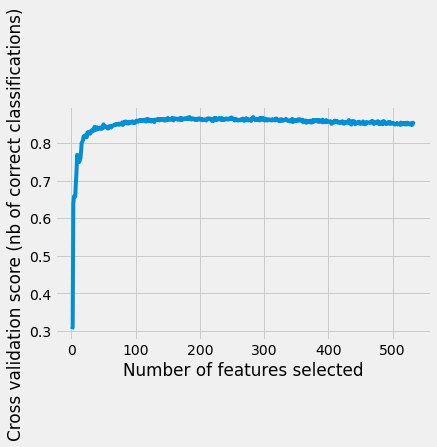

In [131]:
#plt.style.use('fivethirtyeight')
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(selector.grid_scores_) + min_features_to_select),selector.grid_scores_)

plt.show()

In [132]:
nbr_features = np.sum(selector.support_)

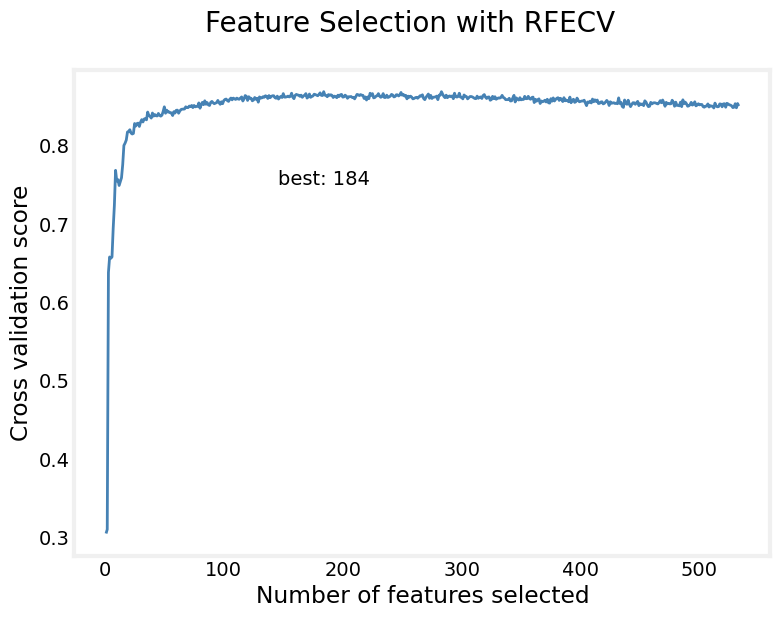

In [133]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

plt.style.use('fivethirtyeight')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")

ax.plot(range(min_features_to_select,
        len(selector.grid_scores_) + min_features_to_select),
        selector.grid_scores_, linewidth='2', color='steelblue')

ax.set_facecolor('white')
fig.set_facecolor('white')
plt.grid(color='#d4d4d4')
fig.suptitle('Feature Selection with RFECV', fontsize=20)
ax.text(nbr_features, 0.75, 'best: '+str(nbr_features), ha='center')
plt.show()

In [134]:
selector.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [135]:
np.sum(selector.support_)

184

In [136]:
selector.ranking_

array([147,   1,  57,   1,   1,   9,  63,   1,   1,   1,   1, 112,   1,
         1,   1,   1,   1,   1, 158, 225,  53, 110,   1,   1,   1,   1,
         1,   1,   6,   1,  35,   1,  87, 186,  28,   1,   1,  24,   1,
       115,   1,   1,   1,   1,   1,   1, 128, 195, 117,   1,   1,   1,
         1,   1,  21,   1, 133,  93,  83,   1,  67,   1,  44, 136,  56,
       168,   1, 236,   1,   1, 270, 272,   1,   1,   1,   1,   1,   1,
       228,   1, 206, 226, 151, 169, 161, 171, 302, 172, 154, 193, 164,
       189, 253,   1, 289, 266, 258, 210, 262, 349, 316, 260, 215, 240,
       175, 315, 281,   1, 320, 314, 241, 232, 325, 346, 252, 271, 259,
       311, 267, 347, 276,   1, 307, 265, 205, 277, 284, 255, 334, 294,
       248, 197, 275, 301, 251,   1, 245, 273, 264, 229, 179, 254, 238,
       174, 209, 292, 223, 214, 199,   1, 246, 291, 285, 283, 239, 282,
       261, 268, 192, 274, 269, 286, 296,   1, 221, 208, 181, 200, 216,
       203, 170, 187, 111, 212,   1,   1,   1,   1,  98, 156,   

In [137]:
features = np.array(data_input.columns)
features

array(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11',
       'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
       'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29',
       'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38',
       'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47',
       'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56',
       'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65',
       'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74',
       'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83',
       'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92',
       'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101',
       'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109',
       'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117',
       'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125',
       'E1

In [138]:
rfecv = features[np.array(selector.support_)]
rfecv

array(['E2', 'E4', 'E5', 'E8', 'E9', 'E10', 'E11', 'E13', 'E14', 'E15',
       'E16', 'E17', 'E18', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28',
       'E30', 'E32', 'E36', 'E37', 'E39', 'E41', 'E42', 'E43', 'E44',
       'E45', 'E46', 'E50', 'E51', 'E52', 'E53', 'E54', 'E56', 'E60',
       'E62', 'E67', 'E69', 'E70', 'E73', 'E74', 'E75', 'E76', 'E77',
       'E78', 'E80', 'E94', 'E108', 'E122', 'E136', 'E150', 'E164', 'T1',
       'T2', 'T3', 'T4', 'T7', 'T8', 'T9', 'T10', 'T11', 'T13', 'T14',
       'T15', 'T16', 'T17', 'T19', 'T22', 'T23', 'T24', 'T25', 'T26',
       'T28', 'T29', 'T30', 'T31', 'T32', 'T34', 'T35', 'T37', 'T39',
       'T40', 'T41', 'T43', 'T44', 'T45', 'T46', 'T47', 'T48', 'T49',
       'T50', 'T52', 'T53', 'T54', 'T55', 'T56', 'T57', 'T58', 'T59',
       'T60', 'T62', 'T65', 'T66', 'T67', 'T74', 'T75', 'T76', 'T81',
       'T84', 'T85', 'T87', 'T88', 'T90', 'T98', 'T101', 'T102', 'T104',
       'T115', 'T116', 'T130', 'T132', 'T139', 'T142', 'T143', 'T144',
       'T

In [139]:
len(rfecv)

184

In [140]:
pd_rfecv = data[['Person', 'class']+list(rfecv)]

pd_rfecv

,Person,class,E2,E4,E5,E8,E9,E10,E11,E13,...,DH73,DH76,DH83,DH90,DH93,DH94,DH99,DH100,DH101,DH104
0,1,1,0.254095,-0.01037,-0.538509,-1.37437,-0.10937,0.10763,0.093296,0.172694,...,12.09630,4901420.0,1.160800e+09,4902090.0,10.43340,5.83548,2.53425,17.3882,8.05589,3028080.0
1,1,1,0.193761,-0.00237,0.781415,-0.71937,-0.08737,0.11163,0.079461,0.142173,...,11.62070,4882550.0,1.142700e+09,4883220.0,10.24230,5.76355,2.51513,16.5914,7.81769,3016420.0
2,1,1,0.182336,-0.02337,0.881194,-0.71937,-0.08037,0.08863,0.074408,0.131310,...,10.57340,4863140.0,1.015080e+09,4863810.0,9.27871,5.16683,2.25959,15.2312,7.11684,3004430.0
3,1,1,0.176636,-0.02737,1.024900,-0.71937,-0.08037,0.07163,0.070138,0.125188,...,9.85611,4843300.0,9.061740e+08,4843960.0,8.65402,4.63212,2.13924,14.4663,6.70236,2992170.0
4,1,1,0.179248,-0.02737,0.935697,-0.75637,-0.08337,0.07163,0.072914,0.127866,...,8.87342,4822950.0,7.843120e+08,4823610.0,7.78651,4.23410,1.93595,12.5493,6.08647,2979610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,40,4,0.254373,-0.00101,-0.165105,-1.19301,-0.15801,0.12299,0.115445,0.187620,...,50.11640,645724.0,5.241020e+09,645610.0,45.16100,24.78100,9.48535,73.9901,31.82590,398810.0
4476,40,4,0.238946,-0.00901,-0.034522,-1.10201,-0.14501,0.11899,0.109450,0.175395,...,46.61380,667729.0,5.109350e+09,667621.0,41.95380,22.77270,8.73701,68.4041,29.83820,412407.0
4477,40,4,0.213325,0.01099,0.613841,-0.57301,-0.10401,0.13699,0.099362,0.159078,...,47.95200,688802.0,4.941720e+09,688691.0,41.81550,22.85350,8.90410,68.5051,30.45150,425422.0
4478,40,4,0.212210,0.01299,0.593249,-0.64101,-0.10001,0.13299,0.098206,0.157308,...,47.35050,711921.0,5.379120e+09,711797.0,43.73450,24.15910,8.97766,72.4431,30.38700,439695.0


In [142]:
pd_rfecv.to_csv('../rfecv_184.csv', index=False)

### Dataframe mit 223 Features nach RFECV

In [144]:
data_input = pd.read_csv('../rfecv_184.csv') 

In [145]:
data_input

,Person,class,E2,E4,E5,E8,E9,E10,E11,E13,...,DH73,DH76,DH83,DH90,DH93,DH94,DH99,DH100,DH101,DH104
0,1,1,0.254095,-0.01037,-0.538509,-1.37437,-0.10937,0.10763,0.093296,0.172694,...,12.09630,4901420.0,1.160800e+09,4902090.0,10.43340,5.83548,2.53425,17.3882,8.05589,3028080.0
1,1,1,0.193761,-0.00237,0.781415,-0.71937,-0.08737,0.11163,0.079461,0.142173,...,11.62070,4882550.0,1.142700e+09,4883220.0,10.24230,5.76355,2.51513,16.5914,7.81769,3016420.0
2,1,1,0.182336,-0.02337,0.881194,-0.71937,-0.08037,0.08863,0.074408,0.131310,...,10.57340,4863140.0,1.015080e+09,4863810.0,9.27871,5.16683,2.25959,15.2312,7.11684,3004430.0
3,1,1,0.176636,-0.02737,1.024900,-0.71937,-0.08037,0.07163,0.070138,0.125188,...,9.85611,4843300.0,9.061740e+08,4843960.0,8.65402,4.63212,2.13924,14.4663,6.70236,2992170.0
4,1,1,0.179248,-0.02737,0.935697,-0.75637,-0.08337,0.07163,0.072914,0.127866,...,8.87342,4822950.0,7.843120e+08,4823610.0,7.78651,4.23410,1.93595,12.5493,6.08647,2979610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,40,4,0.254373,-0.00101,-0.165105,-1.19301,-0.15801,0.12299,0.115445,0.187620,...,50.11640,645724.0,5.241020e+09,645610.0,45.16100,24.78100,9.48535,73.9901,31.82590,398810.0
4476,40,4,0.238946,-0.00901,-0.034522,-1.10201,-0.14501,0.11899,0.109450,0.175395,...,46.61380,667729.0,5.109350e+09,667621.0,41.95380,22.77270,8.73701,68.4041,29.83820,412407.0
4477,40,4,0.213325,0.01099,0.613841,-0.57301,-0.10401,0.13699,0.099362,0.159078,...,47.95200,688802.0,4.941720e+09,688691.0,41.81550,22.85350,8.90410,68.5051,30.45150,425422.0
4478,40,4,0.212210,0.01299,0.593249,-0.64101,-0.10001,0.13299,0.098206,0.157308,...,47.35050,711921.0,5.379120e+09,711797.0,43.73450,24.15910,8.97766,72.4431,30.38700,439695.0


## Optimierung des großen Neuronalen Netzes auf Grundlage der zuvor selektierten Features

In [147]:
data = pd.read_csv('../rfecv_184.csv')

### Bestimmung eines Ablageorts für das spätere Modell

In [148]:
path_models = '../models/'

### Data Preparation

In [149]:
## Splitten der Daten in Features, die Zielvariable 'class' und die Group-Variable 'Person'
data_input = data.drop(['Person', 'class'], axis = 1)
data_person = data['Person']
data_labels_raw = data['class']

## Splitten der Daten in Trainings- und Testdatensatz
train_data, test_data, train_labels_raw, test_labels_raw = train_test_split(
                      data_input, data_labels_raw, test_size = 0.1, random_state=123)

## Skalierung der Daten
scaler = MinMaxScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

## one-hot-encoding 
encoder = LabelBinarizer().fit(train_labels_raw)
train_labels = encoder.transform(train_labels_raw)
test_labels = encoder.transform(test_labels_raw)

## Extrahierung von Features und Zielvariablen
n_attributes = data_input.shape[1]
n_classes = train_labels.shape[1]

### Erstellung des Neuronalen Netzes

In [150]:
def createMyANN(hyperparams):

    #hyperparameters for keras tuner
    hp_units = hyperparams.Int('units', min_value=140, max_value=220, step=20)
    hp_activations = hyperparams.Choice('activation', values=['relu', 'tanh', 'elu'])
    hp_lr = hyperparams.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    hp_nbr_hidden_layers = hyperparams.Int('nbr_hidden_layers', min_value=2, max_value=4, step=1)

    model = Sequential()  
    model.add( InputLayer(input_shape=(n_attributes, ), name="input_1D_vector")) 

    for i in range(hp_nbr_hidden_layers):
        model.add( Dense(units=hp_units, activation=hp_activations,
                             name="hidden" +str(i)+ "_" +str(hp_units)+ "nodes")) #hidden layer


    model.add( Dense(units=n_classes, activation='softmax', name="output_softmax"))
    
    optim = Adam(learning_rate = hp_lr) 
    
    #model.compile(loss='mse', optimizer=optim, metrics=['accuracy'])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])
    
    return model

### Verwendung des Keras-Tuners zur Erschließung der besten Hyperparameter-Kombination

In [152]:
keras_tuner = RandomSearch(
    createMyANN,  
    objective= 'val_accuracy', 
    max_trials=100,  
    executions_per_trial=1,  
    directory= path_models + 'ann_big_opt_feat_sel',
    project_name='ann_big_opt_feat_sel')

import time
time_start = time.time()


keras_tuner.search(train_data, train_labels, validation_split=0.1, 
             epochs=500, verbose=2,
             callbacks=[keras.callbacks.EarlyStopping(patience=50,
                                                      restore_best_weights=True)])

time_end = time.time()

Trial 61 Complete [00h 00m 36s]
val_accuracy: 0.9925742745399475

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 51m 18s
INFO:tensorflow:Oracle triggered exit


In [153]:
hours = (time_end - time_start) // 3600
minutes = ((time_end - time_start) % 3600) // 60
seconds = round((time_end - time_start - hours * 3600 - minutes * 60), 0)
print(f"Elapsed time for model training: {int(hours)}:{int(minutes)}:{int(seconds)} [h:m:s]")

Elapsed time for model training: 0:51:19 [h:m:s]


### Beste Hyperparameter-Kombination aus dem Keras-Tuner

In [154]:
#keras_tuner.search_space_summary()

hyperparams_best = keras_tuner.get_best_hyperparameters()[0].values

print("Best hyperparamters:")
print(hyperparams_best)

keras_tuner.results_summary(1) 

model = keras_tuner.get_best_models(num_models=1)[0] 
print("Best model:")
model.summary()  

tf.keras.utils.plot_model(model) 

model.save(path_models + "ann_big_opt_feat_sel.h5") 

Best hyperparamters:
{'units': 220, 'activation': 'relu', 'learning_rate': 0.001, 'nbr_hidden_layers': 2}
Results summary
Results in ../models/ann_big_opt_feat_sel/ann_big_opt_feat_sel
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 220
activation: relu
learning_rate: 0.001
nbr_hidden_layers: 2
Score: 1.0
Best model:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden0_220nodes (Dense)     (None, 220)               40700     
_________________________________________________________________
hidden1_220nodes (Dense)     (None, 220)               48620     
_________________________________________________________________
output_softmax (Dense)       (None, 4)                 884       
Total params: 90,204
Trainable params: 90,204
Non-trainable params: 0
_________________________________________________________________


In [155]:
print(hyperparams_best)

{'units': 220, 'activation': 'relu', 'learning_rate': 0.001, 'nbr_hidden_layers': 2}


### Anwendung des Modells auf Testdatensatz und Ausgabe der Accuracy sowie Visualisierung der Ergebnisse über Confusion-Matrix

In [156]:
print("######## Results auf test data #########")
pred = model.predict(test_data)
predictions = np.argmax(model.predict(test_data), axis=-1)  
cm = confusion_matrix(test_labels_raw, predictions+1)

acc = accuracy_score(test_labels_raw, predictions+1)
print("Accuracy (test): ", acc)
print(cm)

######## Results auf test data #########
Accuracy (test):  0.984375
[[106   0   1   0]
 [  0 103   5   0]
 [  0   1 105   0]
 [  0   0   0 127]]
